In [40]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division

import glob
import os
import sys
sys.path.append(r"C:\Users\Merlijn van Deen\Documents\GitHub\phd-library")
sys.path.append(r"D:\My Documents\phd-library")
sys.path.append(r'C:\Users\Merlijn van Deen\Dropbox\PhD Rearrangements\figs')
sys.path.append(r"C:\Users\deen\Dropbox\PhD Rearrangements\figs")
import plotprint; reload(plotprint)
from plotprint import printer

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\upar-uperp-collapse-en-scaling
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\upar-uperp-collapse-en-scaling
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [3]:
basedir = r"E:\PhD rearrangements\auto\linres_upps" + "\\"

In [11]:
path = glob.glob(basedir +  "N*P*/")[0]
files = glob.glob(path + "/*.npy")
packfile = files[0]


1024 -2.83 8000


1

In [22]:
def loaddata(path, enough=100000):
    files = glob.glob(path + "/*.npy")
    
    try:
        first = np.load(files[0]).tolist()
    except IndexError:
        return [],[],[]
    shape = first['deltas'].shape
    tril = np.tril(np.ones(shape, dtype=np.bool_), -1)
    
    allperp = []
    allpar = []
    alldeltas = []

    counter = 0

    for packfile in files:
        # check if pack is in shear summary cache
        p,n = os.path.split(packfile)
        _,p = os.path.split(p)
        N = int(p.split("~")[0][1:])
        Ptxt = p.split("~P")[1]
        P = float(Ptxt[0] + "." + Ptxt[1:])
        lP = np.round(np.log10(P),2)
        num = int(n.split(".")[0])

        numpack = np.sum((dataN == N) * (datalP == lP) * (summ["num"] == num))
        if numpack == 0:
            continue
        elif numpack > 1:
            print "More than one result for", packfile

        try:
            packdata = np.load(packfile).tolist()
        except Exception as e:
            print packfile, e
            continue
        u_perp = packdata['u_perp']
        u_par = packdata['u_par']
        deltas = packdata['deltas']

        # filter on positive overlap
        mask = (deltas > 0) * tril
        # REMOVE RATTLERS> I HATE RATTLERS> GAAAAH
        gammas = deltas / u_par
        mask *= np.isfinite(gammas) * (np.abs(gammas) > 1e-14)
        
        allperp.append(u_perp[mask])
        allpar.append(u_par[mask])
        alldeltas.append(deltas[mask])

        counter += np.sum(mask)

        os.write(1, packfile + "\t" + str(counter) + "\n")

        if counter > enough:
            break

    if counter == 0:
        print "No results for ", path
        return [],[],[]

    allperp = np.concatenate(allperp)
    allpar = np.concatenate(allpar)
    alldeltas = np.concatenate(alldeltas)
    
    return allperp, allpar, alldeltas

def load_into(data, x):
    for path in glob.glob(x):
        try:
            data[os.path.split(path)[-1]] = loaddata(path)
        except IndexError as e:
            pass

In [ ]:
# GENERATION OF CACHE

alldirs = glob.glob(basedir +  "N*P*/")

for path in alldirs:
    name = os.path.split(path[:-1])[1]
    fn = "E:/PhD rearrangements/upps_in_contact/%s.npz" % name
    if os.path.exists(fn):
        continue

    print name
    # all entries (we never have more than a few hundred K entries I think, so 1e15 is sufficiently large
    allperp, allpar, alldeltas = loaddata(path, 1e15)
    
    if len(allperp) > 0:
        np.savez(fn, allperp=allperp, allpar=allpar, alldeltas=alldeltas)
    del allperp, allpar, alldeltas

In [48]:
for fn in allfiles:
    name = os.path.split(fn)[1].split(".")[0]
    
    if "N2048" in fn:
        allpar = np.load(fn)["allpar"]
        print fn,len(allpar)
    

E:/PhD rearrangements/upps_in_contact\N2048~P1e-2.npz 431333
E:/PhD rearrangements/upps_in_contact\N2048~P1e-3.npz 370201
E:/PhD rearrangements/upps_in_contact\N2048~P1e-4.npz 308636
E:/PhD rearrangements/upps_in_contact\N2048~P1e-5.npz 144729


2048 18140.873059
2048 1814.0873059
2048 181.40873059
2048 18.140873059
\includegraphics{notebooks/upar-uperp-collapse-en-scaling/upar_0_4.pdf}


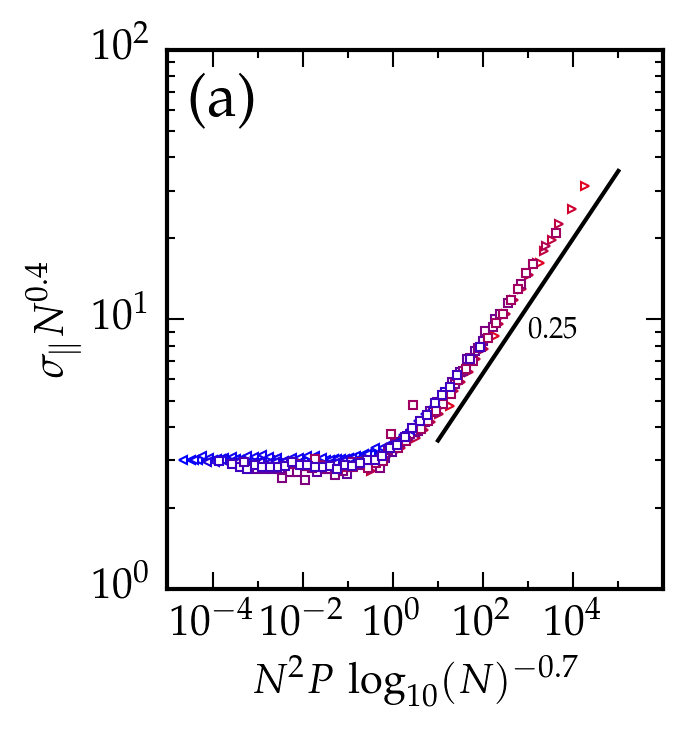

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig=halffig()

ax = gca()

ax.loglog()
ax.set_xlim(1e-5, 1e6)
ax.set_xticks([1e-4,1e-2,1e0,1e2,1e4])
ax.set_xticks([1e-5,1e-3,1e-1,1e1,1e3,1e5], minor=True)
ax.set_ylim(1,100)

ax.set_ylabel(r"$\sigma_\parallel N^{0.4}$", labelpad=2)
ax.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")   

allfiles = glob.glob("E:/PhD rearrangements/upps_in_contact/*.npz")

for fn in allfiles:
    name = os.path.split(fn)[1].split(".")[0]
    
    allpar = np.load(fn)["allpar"]
    
    if len(allpar) < 20:
        continue

    scale = np.std(allpar)
    
    P = name.split("~")[1]
    P = np.float(P[1] + "." + P[2:])
    N = int(name.split("~")[0][1:])
        
    kwargs  = NPmapper(N,P)

    Ncorr = log10(N)**(-0.35)
    ax.plot((N*Ncorr) ** 2 * P,
            scale * (N)**0.4,
            ms=2, **kwargs)

x = np.logspace(1,5)

plt.plot(x, 2*x**0.25, label="0.3", color='black')
plt.text(1e3, 9, "0.25", fontsize='x-small', va='center', ha='left')

subplotlabel('(a)')

savefig('upar_0_4.pdf')

\includegraphics{notebooks/upar-uperp-collapse-en-scaling/uperp-0-5.pdf}


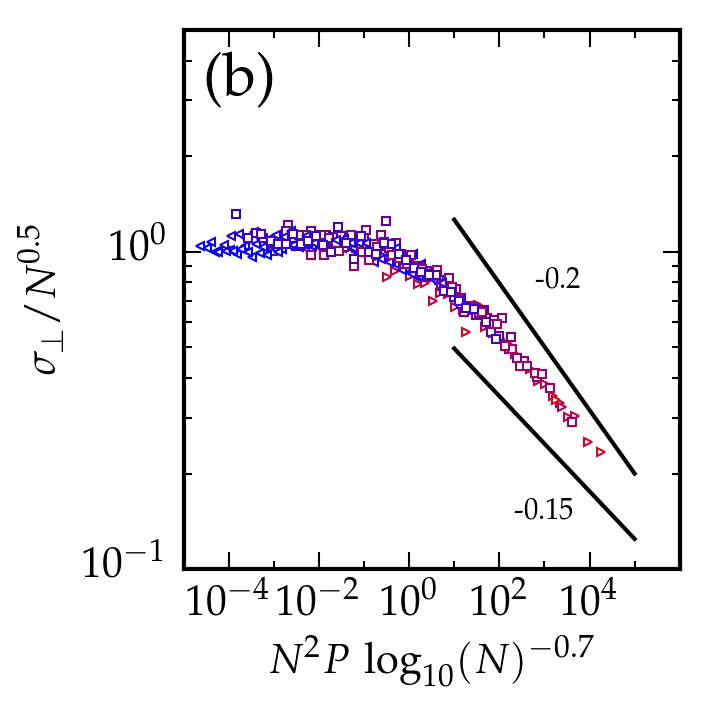

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig=halffig()

x = np.logspace(1,5)
plt.plot(x, 2*x**-0.2, label="-0.2", color="black")
plt.text(2e3, 0.8, "-0.2", fontsize='x-small', va='center', ha='center')

plt.plot(x, 0.7*x**-0.15, label="-0.15", color="black")
plt.text(1e3, 0.15, "-0.15", fontsize='x-small', va='center', ha='center')

ax = gca()

ax.loglog()
ax.set_xlim(1e-5, 1e6)
ax.set_xticks([1e-4,1e-2,1e0,1e2,1e4])
ax.set_xticks([1e-5,1e-3,1e-1,1e1,1e3,1e5], minor=True)
ax.set_ylim(1e-1, 5)
ax.set_ylabel(r"$\sigma_\perp / N^{0.5}$", labelpad=2)
ax.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")   

allfiles = glob.glob("E:/PhD rearrangements/upps_in_contact/*.npz")

for fn in allfiles:
    name = os.path.split(fn)[1].split(".")[0]
    
    allperp = np.load(fn)["allperp"]
    
    if len(allperp) < 20:
        continue

    scale = np.std(allperp)
    
    P = name.split("~")[1]
    P = np.float(P[1] + "." + P[2:])
    N = int(name.split("~")[0][1:])
        
    kwargs  = NPmapper(N,P)

    ax.plot(N ** 2 * P * log10(N)**(-0.7),
            scale / N**0.5,
            ms=2, **kwargs)



#plt.legend(loc="upper left", frameon=False, fontsize='xx-small')

subplotlabel('(b)')

savefig('uperp-0-5.pdf')